## Assignment 4:

<b>Following operations need to be done to selected data set:</b>

1. Removing null values,
2. removing duplicate rows (if present),
3. handling categorical variables,
4. feature scaling, and 
5. removing 1-2 variables using correlation as feature selection

Data sets available in the following file:\
https://docs.google.com/spreadsheets/d/1WjGupcDjBAyHpAEoigxkcmtLmzMYMOTFBH2J3fKNEwk/edit?gid=0#gid=0

<b>Choosing data set:</b>\
Adding the last 4 digits of ID and modding it with 5, then adding 1 to get the number of corresponding data set.

<b>My dataset:</b>\
My ID is <code>22101621</code>, data set will be <code> (1 + 6 + 2 + 1) % 5 = 0 + 1 = 1 </code>.\
Therefore, data set 1 <b>(Housing Price)</b> is selected.


<font color=Ff0000, size=4><b>Disclaimer: The project was done in local machine with sample data in local folder.</b>

In [1]:
((1 + 6 + 2 + 1) % 5) + 1

1

In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np

### Removing Null values


In [3]:
housing = pd.read_csv('sample_data/Housing Price.csv')
print(housing.shape)
print("="*80)
print(housing.isnull().sum())

(545, 13)
price               0
area                9
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [4]:
print("Number of rows with null values in area column: ", housing['area'].isnull().sum())

housing_subset = housing[housing['area'].notnull()]

print("Shape after removing null values: ", housing_subset.shape)

Number of rows with null values in area column:  9
Shape after removing null values:  (536, 13)


### Removing duplicates

In [5]:
print("Shape before removing duplicates: ", housing_subset.shape)

housing_subset = housing_subset.drop_duplicates()

print("Shape after removing duplicates: ", housing_subset.shape)

Shape before removing duplicates:  (536, 13)
Shape after removing duplicates:  (536, 13)


No duplicates were found in this dataset.

### Handling categorical variables/Feature Engineering

In [6]:
housing_subset.info()
housing_subset.head(20)

<class 'pandas.core.frame.DataFrame'>
Index: 536 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             536 non-null    int64  
 1   area              536 non-null    float64
 2   bedrooms          536 non-null    int64  
 3   bathrooms         536 non-null    int64  
 4   stories           536 non-null    int64  
 5   mainroad          536 non-null    object 
 6   guestroom         536 non-null    object 
 7   basement          536 non-null    object 
 8   hotwaterheating   536 non-null    object 
 9   airconditioning   536 non-null    object 
 10  parking           536 non-null    int64  
 11  prefarea          536 non-null    object 
 12  furnishingstatus  536 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 58.6+ KB


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960.0,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
12,9310000,6550.0,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished
13,9240000,3500.0,4,2,2,yes,no,no,yes,no,2,no,furnished
14,9240000,7800.0,3,2,2,yes,no,no,no,no,0,yes,semi-furnished
15,9100000,6000.0,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600.0,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500.0,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600.0,3,2,2,yes,yes,no,no,yes,2,no,furnished


In [7]:
columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

for column in columns:
	print(f"{column}: {housing_subset[column].unique()}")

mainroad: ['yes' 'no']
guestroom: ['no' 'yes']
basement: ['no' 'yes']
hotwaterheating: ['no' 'yes']
airconditioning: ['yes' 'no']
prefarea: ['yes' 'no']
furnishingstatus: ['furnished' 'semi-furnished' 'unfurnished']


In [8]:
columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

for column in columns[:len(columns)-1]:
	housing_subset[column] = housing_subset[column].map({'no':0,'yes':1})

In [9]:
housing_subset['furnishingstatus'] = housing_subset['furnishingstatus'].map({'furnished':2,'semi-furnished':1, 'unfurnished':0})

In [10]:
housing_subset.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.0,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960.0,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960.0,3,2,2,1,0,1,0,0,2,1,1
12,9310000,6550.0,4,2,2,1,0,0,0,1,1,1,1
13,9240000,3500.0,4,2,2,1,0,0,1,0,2,0,2
14,9240000,7800.0,3,2,2,1,0,0,0,0,0,1,1
15,9100000,6000.0,4,1,2,1,0,1,0,0,2,0,1
16,9100000,6600.0,4,2,2,1,1,1,0,1,1,1,0
17,8960000,8500.0,3,2,4,1,0,0,0,1,2,0,2
18,8890000,4600.0,3,2,2,1,1,0,0,1,2,0,2


### Feature Scaling:

In [11]:
print(housing_subset.var())

price               2.996102e+12
area                4.364888e+06
bedrooms            5.359604e-01
bathrooms           2.322081e-01
stories             7.454840e-01
mainroad            1.232494e-01
guestroom           1.436707e-01
basement            2.264437e-01
hotwaterheating     4.285116e-02
airconditioning     2.134712e-01
parking             7.243270e-01
prefarea            1.761334e-01
furnishingstatus    5.775980e-01
dtype: float64


In [12]:
# 'price' and 'area' have high magnitude variance than others.
# They require scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

housing_subset[['price']] = scaler.fit_transform(housing_subset[['price']])

housing_subset[['area']] = scaler.fit_transform(housing_subset[['area']])

housing_subset.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.413620,4,2,3,1,0,0,0,1,2,1,2
1,0.909091,0.524014,4,4,4,1,0,0,0,1,3,0,2
2,0.909091,0.595699,3,2,2,1,0,1,0,0,2,1,1
12,0.654545,0.351254,4,2,2,1,0,0,0,1,1,1,1
13,0.648485,0.132616,4,2,2,1,0,0,1,0,2,0,2
14,0.648485,0.440860,3,2,2,1,0,0,0,0,0,1,1
15,0.636364,0.311828,4,1,2,1,0,1,0,0,2,0,1
16,0.636364,0.354839,4,2,2,1,1,1,0,1,1,1,0
17,0.624242,0.491039,3,2,4,1,0,0,0,1,2,0,2
18,0.618182,0.211470,3,2,2,1,1,0,0,1,2,0,2


### Feature Selection:

In [13]:
housing_subset_corr = housing_subset.corr()

housing_subset_corr

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.513133,0.342946,0.498598,0.433029,0.301417,0.246996,0.166293,0.089732,0.442612,0.352418,0.308523,0.310392
area,0.513133,1.000000,0.118208,0.159484,0.076078,0.290585,0.147814,0.036878,-0.006973,0.214105,0.351616,0.225097,0.173758
bedrooms,0.342946,0.118208,1.000000,0.360723,0.410182,-0.019891,0.070802,0.091071,0.039027,0.154748,0.124677,0.072504,0.121140
bathrooms,0.498598,0.159484,0.360723,1.000000,0.326561,0.032858,0.129637,0.102773,0.046146,0.185167,0.161320,0.044074,0.162789
stories,0.433029,0.076078,0.410182,0.326561,1.000000,0.119268,0.033768,-0.170048,0.019667,0.288413,0.037177,0.029968,0.110708
mainroad,0.301417,0.290585,-0.019891,0.032858,0.119268,1.000000,0.089337,0.040016,-0.014204,0.100293,0.200211,0.196968,0.155899
guestroom,0.246996,0.147814,0.070802,0.129637,0.033768,0.089337,1.000000,0.372040,-0.027733,0.132040,0.024280,0.162528,0.116407
basement,0.166293,0.036878,0.091071,0.102773,-0.170048,0.040016,0.372040,1.000000,-0.005381,0.034434,0.027950,0.223611,0.097196
hotwaterheating,0.089732,-0.006973,0.039027,0.046146,0.019667,-0.014204,-0.027733,-0.005381,1.000000,-0.124843,0.061440,-0.052985,0.033160
airconditioning,0.442612,0.214105,0.154748,0.185167,0.288413,0.100293,0.132040,0.034434,-0.124843,1.000000,0.135775,0.091036,0.140069


<Axes: >

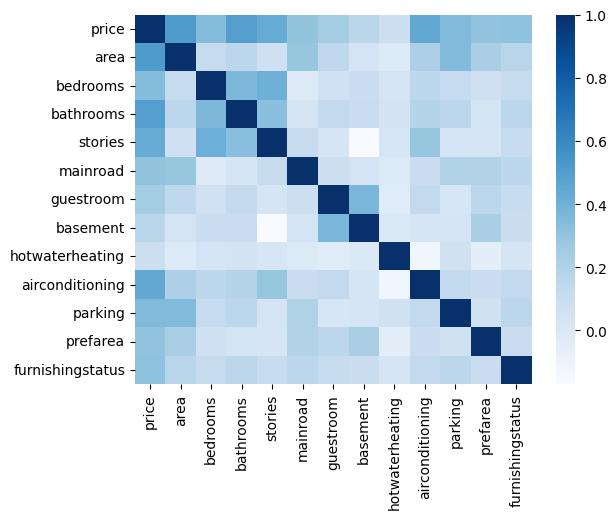

In [14]:
import seaborn as sns

color  = 'Blues'

sns.heatmap(housing_subset_corr, cmap = color)

It seems that no two columns are correlated more than 0.8 with each other so we can't drop any columns.